Annalena Bebenroth (999523) und Maluna Hennecke (1007701) und Linus Kleine Kruthaup (978617)

In [1]:
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Question 1

In [2]:
def sin_FHN(a, b, c, d, V_0, I, sim_time):
    #a = 0.02
    #b = 0.2
    #c = -65
    #d = 6

    eqs = """
    dV/dt = (0.04*V**2 + 5*V +140 - u + I(t)) /ms   :1
    du/dt = (a*(b*V - u)) /ms   :1
    """

    fhn_neuron = NeuronGroup(1, eqs, threshold='V>=30', reset='V=c; u+=d', method= 'euler')
    # initial values
    fhn_neuron.V = V_0
    fhn_neuron.u = "b*V"

    state_monitor = StateMonitor(fhn_neuron, ["V", "u"], record=True)
    fhn_net = Network(fhn_neuron)
    fhn_net.add(state_monitor)
    fhn_net.run(sim_time)
    return state_monitor

In [3]:
def create_ramp(I_):
    t_start = 10
    t_end = 300
    timing_array = np.zeros((t_end+2,))
    timing_array[t_start:t_end] = I_
    ramp_current = TimedArray(timing_array, dt=1.*ms)
    return ramp_current

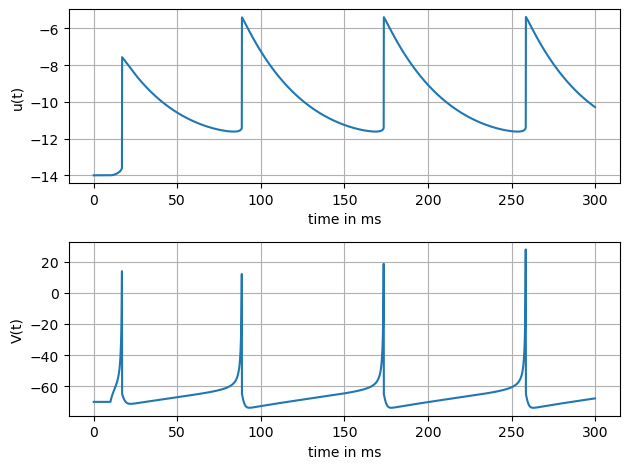

In [12]:
states = sin_FHN(a=0.02, b=0.2, c=-65, d=6, V_0=-70, I=create_ramp(5), sim_time=300*ms)
def plot_V_U(states):
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(states.t/ms, states.u[0])
    axs[0].set_xlabel('time in ms')
    axs[0].set_ylabel('u(t)')
    axs[0].grid(True)

    axs[1].plot(states.t/ms, states.V[0])
    axs[1].set_xlabel('time in ms')
    axs[1].set_ylabel('V(t)')
    axs[1].grid(True)

    fig.tight_layout()
    plt.show()
plot_V_U(states)

The Izhikevich model is given as:
$\dot{V} = 0.04V^{2} + 5V + 140 -u + I$ 

$\dot{u} = a(bV - u)$

with four parameters a,b,c and d.

In order to get the nullclines we set $\dot{x}$ and $\dot{y}$ to be 0.

$\dot{V} = 0 \equiv 0.04V^{2} + 5V + 140 -u + I = 0$

$\dot{u} = 0 \equiv a = 0 $ or $bV = 0$

WARNING    /home/annalena/anaconda3/envs/neurodynamics/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
 [py.warnings]


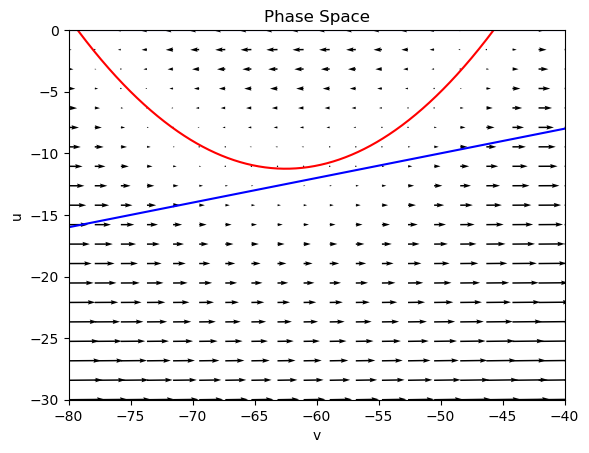

In [27]:
def plot_nullclines(a,b,I, V_0):

    def n1(v,I):
        return I + 0.04*v**2 + 5*v + 140
    def n2(v,b): 
        return b*v

    v = np.linspace(-90,-40,1000)

    plt.plot(v, n1(v, I), color='red')
    plt.axvline(x = 0, color='red')
    plt.plot(v, n2(v, b), color='blue')
    plt.axhline(y = 0, color='blue')

    plt.xlim(-80,-40)
    plt.ylim(-30,0)

    def vector_field(v, u):
        dv = I + 0.04*v**2 + 5*v + 140 -u
        du = a*(b*v - u)
        return dv, du

    x_range = np.linspace(-80, -40, 20)
    y_range = np.linspace(-30, 0, 20)

    X, Y = np.meshgrid(x_range, y_range)

    U, V = vector_field(X, Y)

    plt.quiver(X, Y, U, V)

    def vector_field_trajectory(variables, t):
        u, v = variables
        dv = I + 0.04*v**2 + 5*v + 140 -u
        du = a*(b*v - u)
        return [dv, du]

    # Starting values for the two trajectories
    initial_condition = [b*V_0, V_0]

    # Time points for the simulation
    t = np.linspace(0, 30, 5000)

    # Simulate the trajectories
    trajectory = odeint(vector_field_trajectory, initial_condition, t)

    # Extract x and y coordinates for each trajectory
    x_traj = trajectory[0]
    y_traj = trajectory[1]

    # Plotting phase space
    plt.plot(x_traj[0], y_traj[0], label='Trajectory')


    plt.xlabel('v')
    plt.ylabel('u')
    plt.title('Phase Space')

    plt.show()

plot_nullclines(a=0.02, b=0.2,I=5, V_0=-70)

# Question 2

1) a = 0.02, b = 0.2, c = −65, d = 6, with V 0 = −70 and the applied current I = 14

The many recurrent spikes are reflected in the phase portrait by the nullclines not crossing, therefore having no fixpoint and the arrows pointing to the right, not forced to cross nullclines.

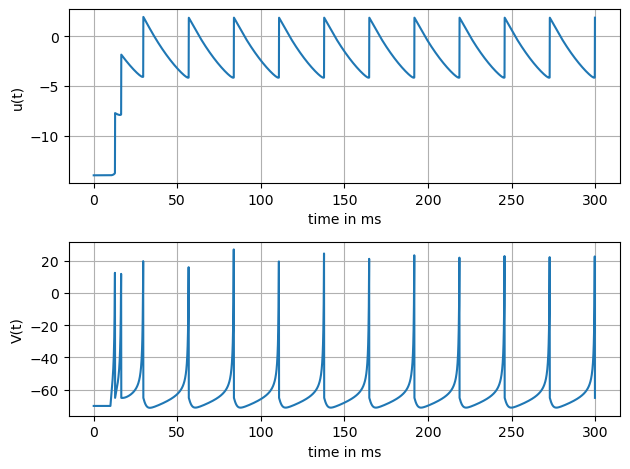

WARNING    /home/annalena/anaconda3/envs/neurodynamics/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
 [py.warnings]


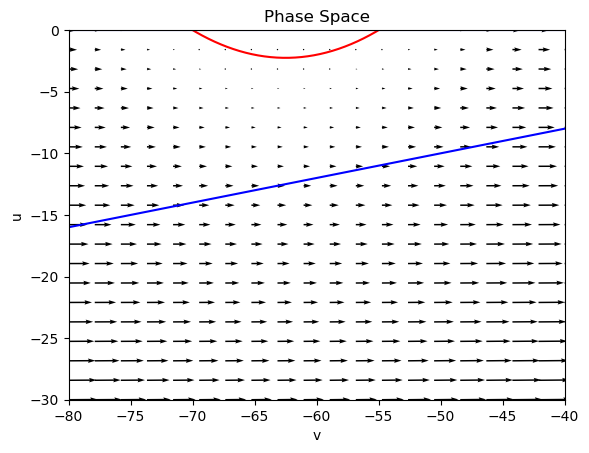

In [21]:
a = 0.02
b = 0.2
c = -65
d = 6
V_0 = -70
I = 14
states = sin_FHN(a, b, c, d, V_0, create_ramp(I), sim_time=300*ms)
plot_V_U(states)
plot_nullclines(a,b,I, V_0)

2) a = 0.02, b = 0.25, c = −65, d = 6, with V 0 = −64 and the applied current I = 0.5

The single spike and visible hyperpolarization are represented in the phase portrait by two fix points and different directions of the arrows in the different parts.

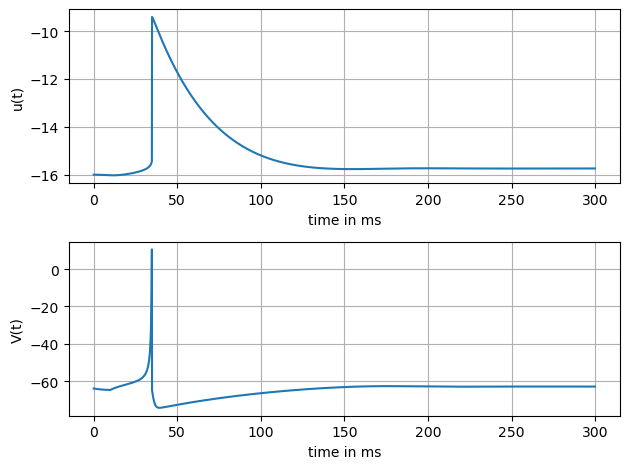

WARNING    /home/annalena/anaconda3/envs/neurodynamics/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
 [py.warnings]


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2483485360176D+02   r2 =  0.1571417613445D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2483485360176D+02   r2 =  0.1571417613445D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2483485360176D+02   r2 =  0.1571417613445D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2483485360176D+02   r2 =  0.1571417613445D-14
 lsoda--  warning..internal t (=r1) 

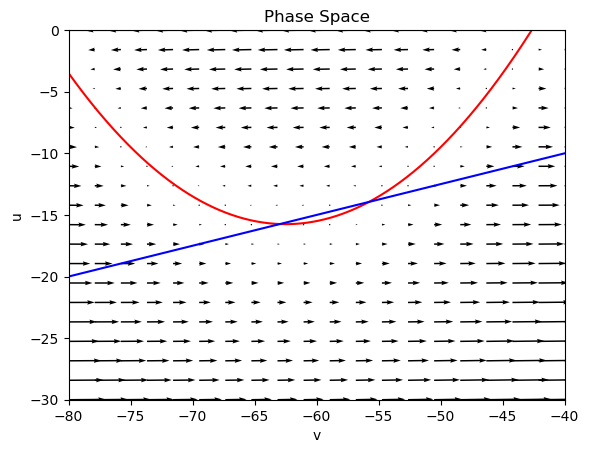

In [22]:
a = 0.02
b = 0.25
c = -65
d = 6
V_0 = -64
I = 0.5
states = sin_FHN(a, b, c, d, V_0, create_ramp(I), sim_time=300*ms)
plot_V_U(states)
plot_nullclines(a,b,I, V_0)

3) a = 0.02, b = 0.2, c = −50, d = 2, with V 0 = −70 and the applied current I = 15
Here again are no fix points and the nullclines so far from each other leading to a not typical spiking behaviour.

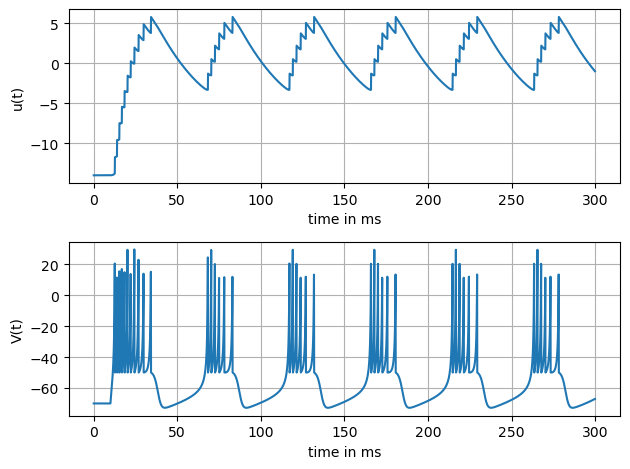

WARNING    /home/annalena/anaconda3/envs/neurodynamics/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
 [py.warnings]


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2760643832532D+01   r2 =  0.1914419494041D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2760643832532D+01   r2 =  0.1914419494041D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2760643832532D+01   r2 =  0.1914419494041D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2760643832532D+01   r2 =  0.1914419494041D-15
 lsoda--  warning..internal t (=r1) 

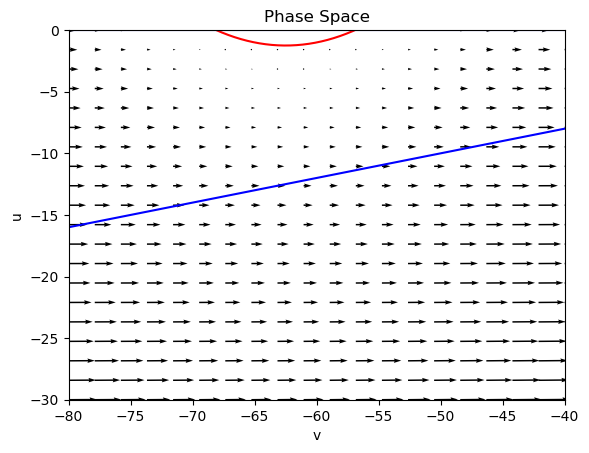

In [23]:
a = 0.02
b = 0.2
c = -50
d = 2
V_0 = -70
I = 15
states = sin_FHN(a, b, c, d, V_0, create_ramp(I), sim_time=300*ms)
plot_V_U(states)
plot_nullclines(a,b,I, V_0)

4) a = 0.02, b = 0.25, c = −55, d = 0.05, with V 0 = −64 and the applied current I = 0.6
This phase portrait looks similar to the second one but differs in not a clear spike but high frequented one.

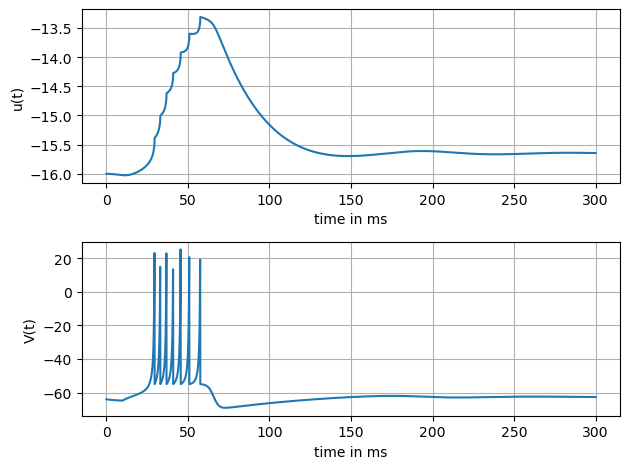

WARNING    /home/annalena/anaconda3/envs/neurodynamics/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
 [py.warnings]


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1885720915019D+02   r2 =  0.1571686926683D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1885720915019D+02   r2 =  0.1571686926683D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1885720915019D+02   r2 =  0.1571686926683D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1885720915019D+02   r2 =  0.1571686926683D-14
 lsoda--  warning..internal t (=r1) 

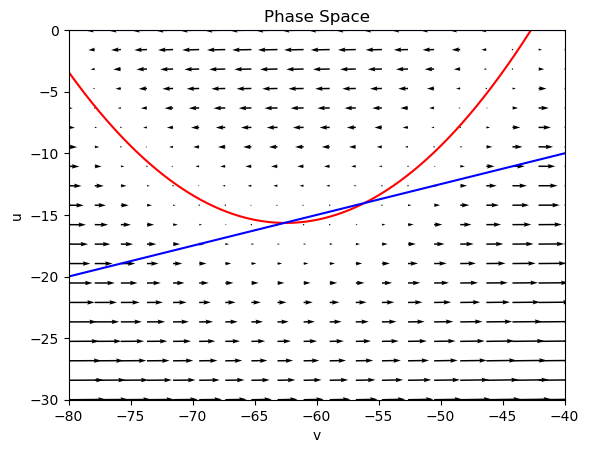

In [24]:
a = 0.02
b = 0.25
c = -55
d = 0.05
V_0 = -64
I = 0.6
states = sin_FHN(a, b, c, d, V_0, create_ramp(I), sim_time=300*ms)
plot_V_U(states)
plot_nullclines(a,b,I, V_0)